<a href="https://colab.research.google.com/github/Abhiraj36/HumanEmotionsDetection/blob/main/Human_Emotion_Dataset_Prediction_Using_Tensorfow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:

import kagglehub
muhammadhananasghar_human_emotions_datasethes_path = kagglehub.dataset_download('muhammadhananasghar/human-emotions-datasethes')

print('Data source import complete.')


Data source import complete.


In [127]:
import os

base_path = muhammadhananasghar_human_emotions_datasethes_path
for root, dirs, files in os.walk(base_path):
    print(root)
    break


/kaggle/input/human-emotions-datasethes


In [128]:
import os

base_path = "/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4"
for item in os.listdir(base_path):
    print(item)


Emotions Dataset
EmotionsDataset_Splitted
EmotionsDataset


In [129]:
nested_path = os.path.join(base_path, "Emotions Dataset", "Emotions Dataset")
print("Contents of nested folder:")
print(os.listdir(nested_path))


Contents of nested folder:
['train', 'test']


In [130]:
subdirs = ["Emotions Dataset", "EmotionsDataset", "EmotionDataset_Splitted"]
base_path = "/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4"



# Data Loading

In [131]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras.layers import Permute,Dense,Flatten,Conv2D,Resizing,Rescaling,Input,Dropout,InputLayer,MaxPool2D,BatchNormalization,RandomContrast,RandomFlip,RandomRotation,MaxPooling2D,Activation,GlobalAveragePooling2D,Add,Embedding,LayerNormalization,MultiHeadAttention
from tensorflow.keras.regularizers import L2
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer

In [132]:
train_directory = os.path.join(base_path, "Emotions Dataset", "Emotions Dataset", "train")
val_directory = os.path.join(base_path, "Emotions Dataset", "Emotions Dataset", "test")

CLASS_NAMES=['angry','happy','sad']

In [133]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
}

In [134]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99
)


Found 6799 files belonging to 3 classes.


In [135]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99
)


Found 2278 files belonging to 3 classes.


In [136]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
    "LEARNING_RATE": 1e-3,
#     "N_EPOCHS": 20,
    "N_EPOCHS": 5,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 3,
    "PATCH_SIZE": 16,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ["angry", "happy", "sad"],
}

In [137]:
train = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 6799 files belonging to 3 classes.


In [138]:
val = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=1,#CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 2278 files belonging to 3 classes.


In [139]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99
)


Found 6799 files belonging to 3 classes.


In [140]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99
)

Found 2278 files belonging to 3 classes.


# Data Visualization

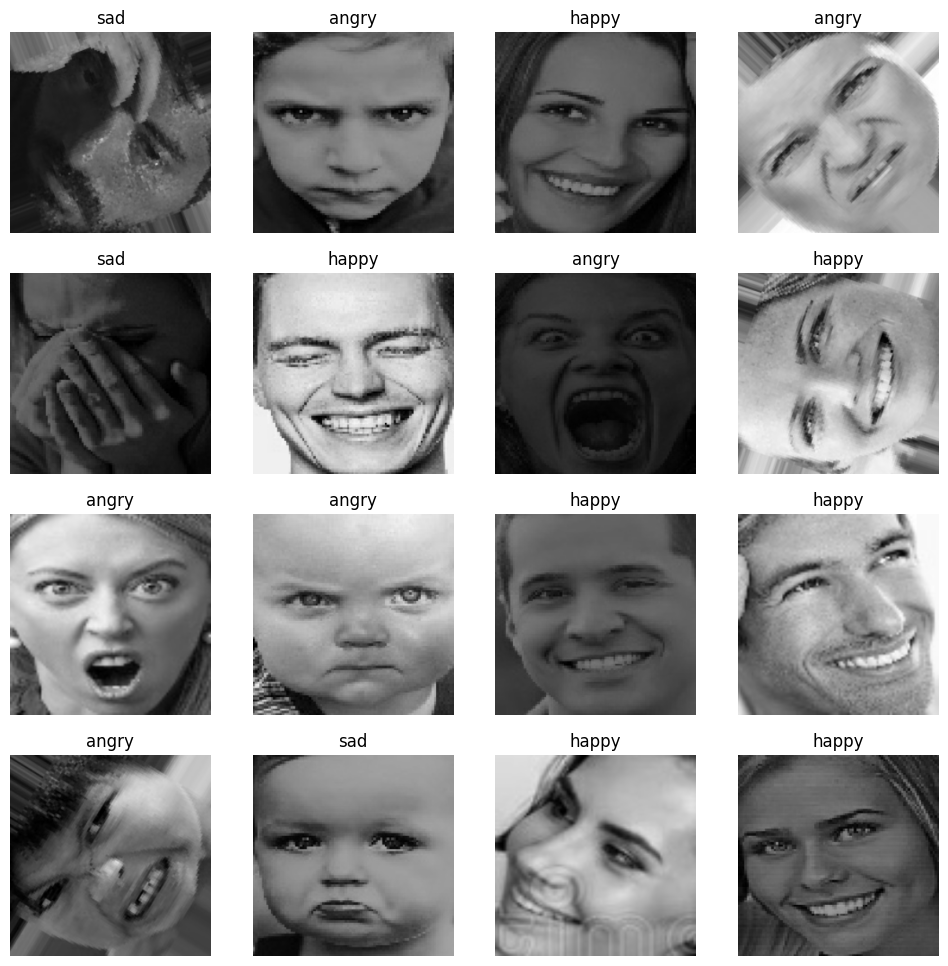

In [141]:
plt.figure(figsize=(12,12))
for images,labels in train_dataset.take(1):
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(images[i]/255)
        plt.title(CLASS_NAMES[tf.argmax(labels[i],axis=0)])
        plt.axis('off')

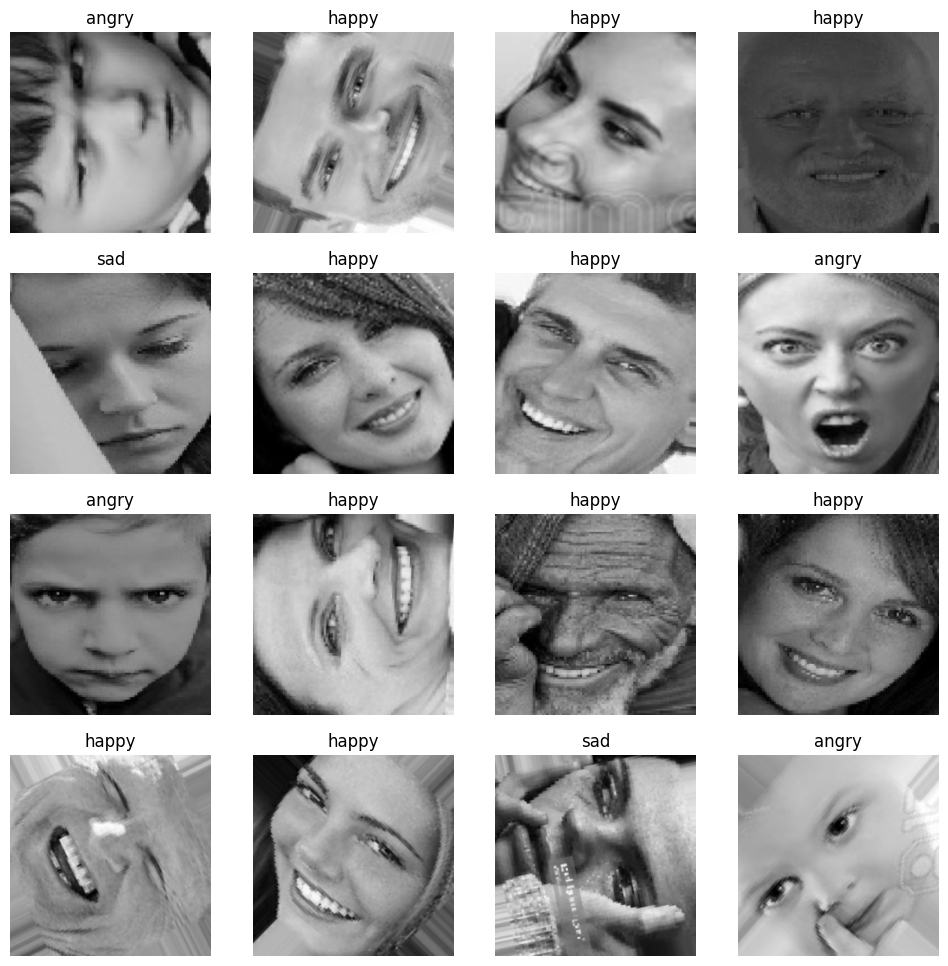

In [142]:
plt. figure(figsize = (12,12))
for images, labels in train_dataset. take (1) :
    for i in range (16):
        ax = plt.subplot(4,4, i+1)
        plt. imshow(images [i]/255)
        plt. title(CLASS_NAMES[tf.argmax(labels[i], axis = 0).numpy ()])
        plt.axis ("off")

# Data Preparation

In [143]:
training_dataset = (
        train_dataset
        .prefetch(tf.data.AUTOTUNE)
)

In [144]:
training_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [145]:
validation_dataset = (
        val_dataset
        .prefetch(tf.data.AUTOTUNE)
)

In [146]:
validation_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [147]:
resize_rescale_layers=tf.keras.Sequential([
            Resizing(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
            Rescaling(1./255)
])

# Modelling

In [148]:
lenet_model = tf.keras.Sequential(
    [
#     InputLayer(input_shape = (None, None, 3), ),

#     resize_rescale_layers,
    InputLayer (input_shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION[ "IM_SIZE"], 3)),
    Rescaling(1./255, name = "rescaling"),

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

# Training

In [149]:
loss_function=tf.keras.losses.CategoricalCrossentropy()
#loss_function = SparseCategoricalCrossentropy ()

In [150]:
# y_true = [[0, 1, 0], [0, 9, 1]]
# y_pred = [[0.01,0.05,0.96], [0.1, 0.2, 0.7]]
# # Using 'auto'T'sum_over_batch_size' reduction type.
# cce = tf. keras. losses.CategoricalCrossentropy()
# print (cce(y_true, y_pred). numpy ())

In [151]:
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=2,name='top_k_accurcay')]

In [152]:
#lenet_model.compile(
#                    optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
#                    loss=loss_function,
#                    metrics=metrics
#                                    )

In [153]:
#history= lenet_model.fit(
#    training_dataset,
#    validation_data=val_dataset,
#    epochs=CONFIGURATION['N_EPOCHS'],
#    verbose=1)

In [154]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model_loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train_loss','val_loss'])
# plt.show()

In [155]:
# plt. plot (history. history['accuracy'])
# plt. plot(history.history[ 'val_accuracy'])
# plt. title( 'Model accuracy')
# plt. ylabel( 'accuracy')
# plt. xlabel( 'epoch')
# plt. legend(['train_accuracy', 'val_accuracy'])
# plt. show()

# Evalution

In [156]:
#lenet_model. evaluate(validation_dataset)

# Testing

In [157]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3), ),

    resize_rescale_layers,
#     InputLayer (input_shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION[ "IM_SIZE"], 3)),
#     Rescaling(1./255, name = "rescaling"),

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

In [158]:
import cv2
import tensorflow as tf

image_path = '/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg'
test_image = cv2.imread(image_path)

# Step 1: Check if image was loaded correctly
if test_image is None:
    print("Failed to load image. Please check the path.")
else:
    # Step 2: Resize to model input size
    test_image = cv2.resize(test_image, (CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]))

    # Step 3: Convert BGR (OpenCV format) to RGB
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    # Step 4: Normalize and expand dimensions
    im = tf.constant(test_image, dtype=tf.float32) / 255.0
    im = tf.expand_dims(im, axis=0)  # Make it (1, height, width, 3)

    # Step 5: Predict
    prediction = lenet_model(im)
    predicted_class = tf.argmax(prediction, axis=-1).numpy()[0]
    print(f"Predicted Emotion: {CLASS_NAMES[predicted_class]}")


Predicted Emotion: sad


In [159]:
# pred=lenet_model.predict(im)
# print(CONFIGURATION['CLASS_NAMES'][tf.argmax(pred,axis=-1)[0]])

In [160]:
# test_image = cv2. imread("/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg")
# im = tf. constant(test_image, dtype = tf. float32)
 #im = tf. expand_dims (im, axis = 0)
#print(CLASS_NAMES[tf.argmax(lenet_model(im), axis = -1).numpy() [0]])

In [161]:
CLASS_NAMES=['angry','happy','sad']
test_image = cv2.imread('/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

im = tf.constant(test_image, dtype=tf.float32)
im = tf.expand_dims(im, axis=0)

predicted_class_index = tf.argmax(lenet_model(im), axis=-1).numpy()[0]
predicted_class_name = CLASS_NAMES[predicted_class_index]
print(predicted_class_name)


sad


In [162]:
# plt.figure(figsize = (12,12))

# for images, labels in validation_dataset.take(1):
#   for i in range(16):
#     ax = plt.subplot(4,4, i+1)
#     plt.imshow(images[i]/255.)

#     plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis = -1).numpy()]
#               + "\n" + "Predicted Label - : "
#               + CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis = 0)), axis =-1).numpy()[0])] )
#     plt.axis("off")

sad


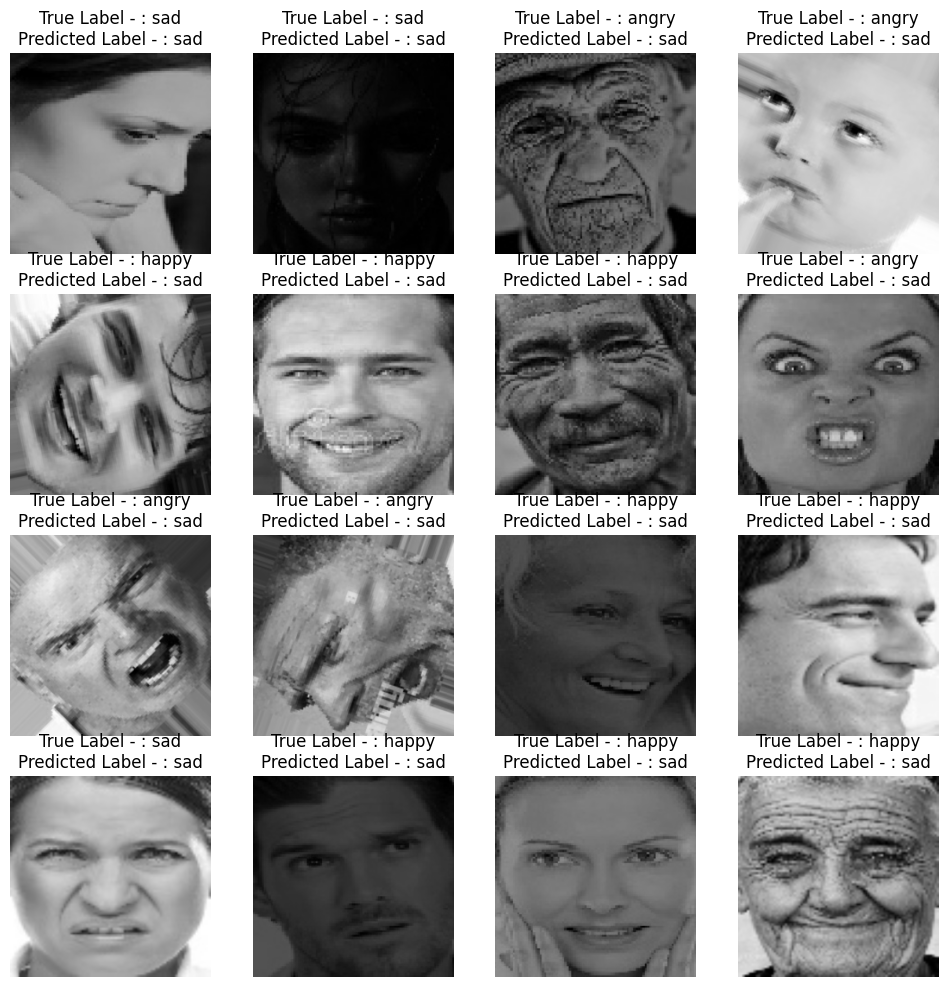

In [163]:
import cv2
import matplotlib.pyplot as plt

test_image = cv2.imread('/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

im = tf.constant(test_image, dtype=tf.float32)
im = tf.expand_dims(im, axis=0)
print(CLASS_NAMES[tf.argmax(lenet_model(im), axis=-1).numpy()[0]])

plt.figure(figsize=(12, 12))

for images, labels in validation_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i] / 255.)

        plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=-1).numpy()] +
                  "\n" + "Predicted Label - : " +
                  CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)), axis=-1).numpy()[0])])
        plt.axis("off")


# Confusion Matrix

In [164]:
predicted = []
labels = []
for im, label in validation_dataset:
    predicted. append (lenet_model (im))
    labels. append (label.numpy())

In [165]:
#print(labels)

In [166]:
#print(np.argmax(labels))

In [167]:
print(np.argmax(labels[:2], axis = -1))

[[1 1 1 2 1 1 2 0 2 0 1 1 2 1 2 1 2 2 2 2 2 2 0 1 2 2 2 2 1 1 1 2]
 [1 1 1 1 0 1 1 1 1 2 1 2 1 1 2 0 2 1 0 2 2 2 0 1 2 0 1 2 0 2 2 1]]


In [168]:
print(np.argmax(labels[:2], axis = -1).flatten())

[1 1 1 2 1 1 2 0 2 0 1 1 2 1 2 1 2 2 2 2 2 2 0 1 2 2 2 2 1 1 1 2 1 1 1 1 0
 1 1 1 1 2 1 2 1 1 2 0 2 1 0 2 2 2 0 1 2 0 1 2 0 2 2 1]


In [169]:
print(np.argmax(labels[:-1], axis = -1). flatten())
print(np.argmax(predicted[: -1], axis = -1). flatten ())

[1 1 1 ... 2 1 0]
[2 2 2 ... 2 2 2]


In [170]:
pred = np.argmax(predicted[:-1], axis = -1). flatten ()
lab = np. argmax(labels [: -1], axis = -1).flatten ()

In [171]:
predicted = []
labels = []
for im, label in validation_dataset:
    predicted. append (lenet_model (im))
    labels. append(label. numpy())

In [172]:
 #print (np. concatenate([np.argmax(labels[: -1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1). flatten()])
# print (np.concatenate([np. argmax(predicted[: -1], axis = -1). flatten(), np.argmax(predicted[-1], axis = -1). flatten()])

In [173]:
import numpy as np

labels = np.random.randint(0, 10, size=(5,5))
predicted = np.random.randint(0, 10, size=(5,5))

def fix_concat(labels, predicted):
 return np.concatenate([np.argmax(labels[:-1], axis=-1).flatten(),
                        np.argmax(labels[-1], axis=-1).flatten(),
                        np.argmax(predicted[:-1], axis=-1).flatten(),
                        np.argmax(predicted[-1], axis=-1).flatten()])

result = fix_concat(labels.copy(), predicted.copy())
print(result)


[2 1 3 2 2 2 1 0 1 2]


# Data Augmentation

In [174]:
### tf.keras.layer augment
augment_layers = tf.keras.Sequential([
RandomRotation (factor = (0.25, 0.2501), ),
RandomFlip (mode= 'horizontal',),
RandomContrast(factor=0.1),
])

In [175]:
def augment_layer(image, label):
    return augment_layers (image,training = True),

In [176]:
training_dataset = (
    train_dataset
    .map(augment_layer, num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)


In [177]:
training_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),)>

In [178]:
validation_dataset = (
        val_dataset
        .prefetch(tf.data.AUTOTUNE)
)

In [179]:
validation_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [180]:
resize_rescale_layers=tf.keras.Sequential([
            Resizing(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
            Rescaling(1./255)
])

In [181]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3), ),

    resize_rescale_layers,
#     InputLayer (input_shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION[ "IM_SIZE"], 3)),
#     Rescaling(1./255, name = "rescaling"),

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_15 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

In [182]:
loss_function=tf.keras.losses.CategoricalCrossentropy()

In [183]:
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=2,name='top_k_accurcay')]

In [184]:
#lenet_model.compile(
     #               optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
     #               loss=loss_function,
     #               metrics=metrics
     #                               )

In [185]:
# Example to verify the datasets
print("Training dataset batch shape:", next(iter(training_dataset))[0].shape)
print("Validation dataset batch shape:", next(iter(val_dataset))[0].shape)


Training dataset batch shape: (32, 256, 256, 3)
Validation dataset batch shape: (32, 256, 256, 3)


In [186]:
#if training_dataset is None:
#    print("Training dataset is None.")
#else:
 #   print(f"Training dataset element_spec: {training_dataset.element_spec}")

#if val_dataset is None:
#    print("Validation dataset is None.")
#else:
#   print(f"Validation dataset element_spec: {val_dataset.element_spec}")



In [187]:
#history = lenet_model.fit(
#    training_dataset,
#    validation_data=val_dataset,
#    epochs=CONFIGURATION.get('N_EPOCHS', 10),  # Use get() method for safe default
#    verbose=1
#)


In [188]:
#lenet_model. evaluate(validation_dataset)

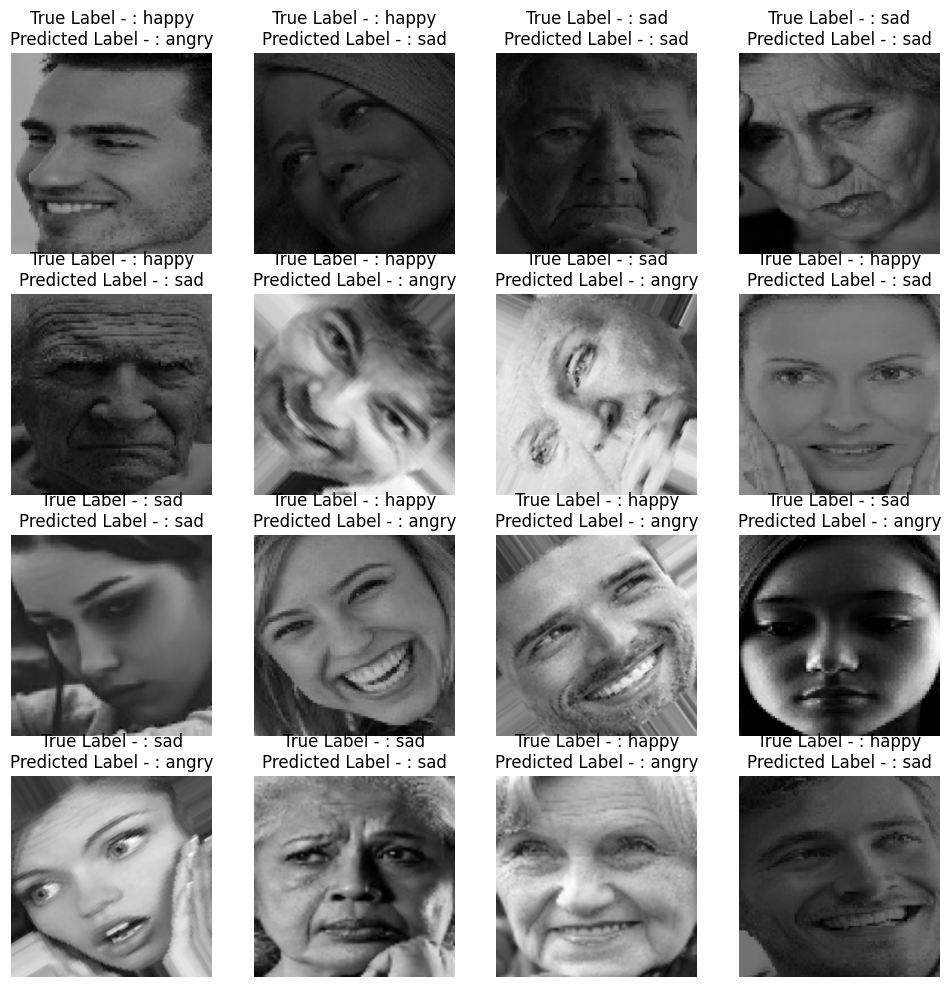

In [189]:
import cv2
import matplotlib.pyplot as plt

# test_image = cv2.imread('/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

# im = tf.constant(test_image, dtype=tf.float32)
# im = tf.expand_dims(im, axis=0)
# print(CLASS_NAMES[tf.argmax(lenet_model(im), axis=-1).numpy()[0]])

plt.figure(figsize=(12, 12))

for images, labels in validation_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i] / 255.)

        plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=-1).numpy()] +
                  "\n" + "Predicted Label - : " +
                  CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)), axis=-1).numpy()[0])])
        plt.axis("off")

# Cutmix Data Augmentation

In [190]:
def box(lamda):

  r_x = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION["IM_SIZE"]).sample(1)[0], dtype = tf.int32)
  r_y = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION["IM_SIZE"]).sample(1)[0], dtype = tf.int32)

  r_w = tf.cast(CONFIGURATION["IM_SIZE"]*tf.math.sqrt(1-lamda), dtype = tf.int32)
  r_h = tf.cast(CONFIGURATION["IM_SIZE"]*tf.math.sqrt(1-lamda), dtype = tf.int32)

  r_x = tf.clip_by_value(r_x - r_w//2, 0, CONFIGURATION["IM_SIZE"])
  r_y = tf.clip_by_value(r_y - r_h//2, 0, CONFIGURATION["IM_SIZE"])

  x_b_r = tf.clip_by_value(r_x + r_w//2, 0, CONFIGURATION["IM_SIZE"])
  y_b_r = tf.clip_by_value(r_y + r_h//2, 0, CONFIGURATION["IM_SIZE"])

  r_w = x_b_r - r_x
  if(r_w == 0):
    r_w  = 1

  r_h = y_b_r - r_y
  if(r_h == 0):
    r_h = 1

  return r_y, r_x, r_h, r_w

In [191]:
def cutmix(train_dataset_1, train_dataset_2):
    (image_1,label_1), (image_2, label_2) = train_dataset_1, train_dataset_2
    lamda = tfp.distributions.Beta(2,2)
    lamda = lamda.sample(1)[0]

    r_y, r_x, r_h, r_w = box(lamda)
    crop_2 = tf.image.crop_to_bounding_box(image_2, r_y, r_x, r_h, r_w)
    pad_2 = tf.image.pad_to_bounding_box(crop_2, r_y, r_x, CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"])

    crop_1 = tf.image.crop_to_bounding_box(image_1, r_y, r_x, r_h, r_w)
    pad_1 = tf.image.pad_to_bounding_box(crop_1, r_y, r_x, CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"])

    image = image_1 - pad_1 + pad_2

    lamda = tf.cast(1- (r_w*r_h)/(CONFIGURATION["IM_SIZE"]*CONFIGURATION["IM_SIZE"]), dtype = tf.float32)
    label = lamda*tf.cast(label_1, dtype = tf.float32) + (1-lamda)*tf.cast(label_2, dtype = tf.float32)

    return image, label

In [192]:
train_dataset_1 = train.map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)
train_dataset_2 = train.map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)

mixed_dataset = tf.data.Dataset.zip((train_dataset_1, train_dataset_2))

In [193]:

# training_dataset = (
#     mixed_dataset
#     .map(cutmix, num_parallel_calls=tf.data.AUTOTUNE)
# #     .prefetch(tf.data.AUTOTUNE)
# )c


In [194]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3), ),

    resize_rescale_layers,
#     InputLayer (input_shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION[ "IM_SIZE"], 3)),
#     Rescaling(1./255, name = "rescaling"),

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_15 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

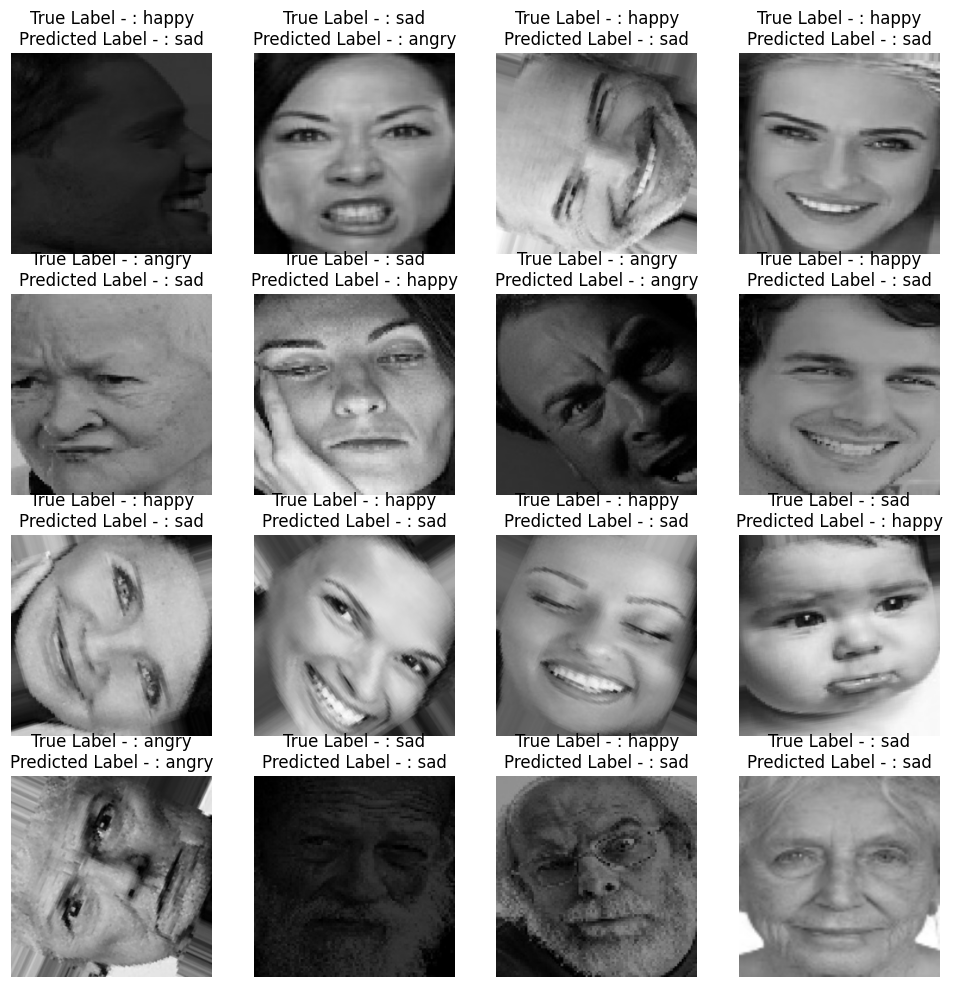

In [195]:
import cv2
import matplotlib.pyplot as plt

# test_image = cv2.imread('/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

# im = tf.constant(test_image, dtype=tf.float32)
# im = tf.expand_dims(im, axis=0)
# print(CLASS_NAMES[tf.argmax(lenet_model(im), axis=-1).numpy()[0]])

plt.figure(figsize=(12, 12))

for images, labels in validation_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i] / 255.)

        plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=-1).numpy()] +
                  "\n" + "Predicted Label - : " +
                  CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)), axis=-1).numpy()[0])])
        plt.axis("off")

# TFRecords

In [196]:
training_dataset = (
training_dataset
.unbatch()
)


In [197]:
validation_dataset = (
validation_dataset
.unbatch()
)

In [198]:
training_dataset

<_UnbatchDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None),)>

In [199]:
validation_dataset

<_UnbatchDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(3,), dtype=tf.float32, name=None))>

In [200]:
def create_example(image, label):
    bytes_feature = Feature (
        bytes_list=BytesList(value=image))
    int_feature = Feature (
        int64_list=Int64List(value=label))
    example = Example(
        features=Features (feature={
        'images': bytes_feature,
        'labels': int_feature,
}))
    return example.SerializeToString()

In [201]:
NUM_SHARDS=10
PATH='/kaggle/working/shard_{:02d}.tfrecord'

In [202]:
def encode_image(image, label) :
    image = tf. io. encode_peg (image)
    return image, label

In [203]:
def encode_image (image, label):
    image = tf. image.convert_image_dtype(image, dtype=tf.uint8)
    image = tf.io. encode_jpeg (image)
    return image, label

In [204]:
# encoded_dataset = (
#     training_dataset
#     .map(encode_image)
# )

In [205]:
# for shard_number in range(NUM_SHARDS):
#   sharded_dataset = encoded_dataset.shard(NUM_SHARDS, shard_number).as_numpy_iterator()

#   with tf.io.TFRecordWriter(PATH.format(shard_number)) as file_writer:
#     for encoded_image, encoded_label in sharded_dataset:
#       example = create_example(encoded_image, encoded_label)
#       file_writer.write(example)


In [206]:
# for shard_number in range(NUM_SHARDS):

#   sharded_dataset = (
#       encoded_dataset
#       .shard(NUM_SHARDS, shard_number)
#       .as_numpy_iterator()
#   )

#   with tf.io.TFRecordWriter(PATH.format(shard_number)) as file_writer:
#     for encoded_image, encoded_label in sharded_dataset:

#       example = create_example(encoded_image, encoded_label)
#       file_writer.write(example)

In [207]:
VAL_NUM_SHARDS=3
VAL_PATH='/kaggle/working/val_shard_{:02d}.tfrecord'

In [208]:
encoded_val=(
     validation_dataset
     .map(encode_image)
)

In [209]:

# for shard_number in range(VAL_NUM_SHARDS):
#     sharded_val=(
#         encoded_val
#         .shard(VAL_NUM_SHARDS,shard_number)
#         .as_numpy_iterator()
#    )

#     with tf.io.TFRecordWriter(VAL_PATH.format(shard_number)) as file_writer:
#         for image,label in sharded_val:
#             file_writer.write(create_example(image,label))

In [210]:
recons_dataset = tf.data.TFRecordDataset(
    filenames =[PATH.format(p) for p in range(NUM_SHARDS)] )
recons_val_dataset=tf.data.TFRecordDataset(filenames=[VAL_PATH.format(p) for p in range(VAL_NUM_SHARDS)])

In [211]:
def parse_tfrecords(example):

    feature_description = {
          "images": tf.io.FixedLenFeature([], tf.string),
          "labels": tf.io.FixedLenFeature([], tf.int64),
      }

    example = tf.io.parse_single_example(example, feature_description)
    example["images"] = tf.image.convert_image_dtype(tf.io.decode_jpeg(example["images"],channels=3), dtype=tf.float32)

    return example["images"], example["labels"]


In [212]:

parsed_dataset = (
    recons_dataset
    .map(parse_tfrecords)
    .batch(CONFIGURATION["BATCH_SIZE"])
    .prefetch(tf.data.AUTOTUNE)
)

In [213]:
val_parsed_dataset= (
    recons_val_dataset
    .map(parse_tfrecords)
    .batch(CONFIGURATION["BATCH_SIZE"])
    .prefetch(tf.data.AUTOTUNE)
)

In [214]:
# plt.figure(figsize=(12,12))
# for images,labels in val_parsed_dataset.take(1):
#     for i in range(16):
#         ax=plt.subplot(4,4,i+1)
#         plt.imshow(images[i])
#         plt.title(CLASS_NAMES[(labels[i])])
#         plt.axis('off')

In [215]:
resize_rescale_layers=tf.keras.Sequential([
            Resizing(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
])

In [216]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3) ),

    resize_rescale_layers,

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

In [217]:
loss_function=tf.keras.losses.SparseCategoricalCrossentropy()
metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
lenet_model.compile(
                    optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
                    loss=loss_function,
                    metrics=metrics
                                    )

In [218]:

# history= lenet_model.fit(
     #parsed_dataset,
    # validation_data=val_parsed_dataset,
     #epochs=CONFIGURATION['N_EPOCHS'],
    # verbose=1)

In [219]:
# import cv2
# import matplotlib.pyplot as plt

# # test_image = cv2.imread('/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

# # im = tf.constant(test_image, dtype=tf.float32)
# # im = tf.expand_dims(im, axis=0)
# # print(CLASS_NAMES[tf.argmax(lenet_model(im), axis=-1).numpy()[0]])

# plt.figure(figsize=(12, 12))

# for images, labels in validation_dataset.take(1):
#     for i in range(16):
#         ax = plt.subplot(4, 4, i + 1)
#         plt.imshow(images[i] / 255.)

#         plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=-1).numpy()] +
#                   "\n" + "Predicted Label - : " +
#                   CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)), axis=-1).numpy()[0])])
#         plt.axis("off")

# Custom Conv2D

In [220]:
class CustomConv2D(Layer):
  def __init__(self, n_filters, kernel_size, n_strides, padding = 'valid'):
    super(CustomConv2D, self).__init__(name = 'custom_conv2d')

    self.conv = Conv2D(
        filters = n_filters,
        kernel_size = kernel_size,
        activation = 'relu',
        strides = n_strides,
        padding = padding)

    self.batch_norm = BatchNormalization()

  def call(self, x, training = True):

    x = self.conv(x)
    x = self.batch_norm(x, training)

    return x

# Residual Block

In [221]:
class ResidualBlock(Layer):
  def __init__(self, n_channels, n_strides = 1):
    super(ResidualBlock, self).__init__(name = 'res_block')

    self.dotted = (n_strides != 1)

    self.custom_conv_1 = CustomConv2D(n_channels, 3, n_strides, padding = "same")
    self.custom_conv_2 = CustomConv2D(n_channels, 3, 1, padding = "same")

    self.activation = Activation('relu')

    if self.dotted:
      self.custom_conv_3 = CustomConv2D(n_channels, 1, n_strides)

  def call(self, input, training=True):

    x = self.custom_conv_1(input, training)
    x = self.custom_conv_2(x, training)

    if self.dotted:
      x_add = self.custom_conv_3(input, training)
      x_add = Add()([x, x_add])
    else:
      x_add = Add()([x, input])

    return self.activation(x_add)

# Complete Network

In [222]:
class ResNet34(tf.keras.Model):
    def __init__(self):
        super(ResNet34, self).__init__(name='resnet_34')

        self.conv_1 = CustomConv2D(64, 7, 2, padding='same')
        self.max_pool = tf.keras.layers.MaxPooling2D(3, 2)

        self.conv_2_1 = ResidualBlock(64)
        self.conv_2_2 = ResidualBlock(64)
        self.conv_2_3 = ResidualBlock(64)

        self.conv_3_1 = ResidualBlock(128, 2)
        self.conv_3_2 = ResidualBlock(128)
        self.conv_3_3 = ResidualBlock(128)
        self.conv_3_4 = ResidualBlock(128)

        self.conv_4_1 = ResidualBlock(256, 2)
        self.conv_4_2 = ResidualBlock(256)
        self.conv_4_3 = ResidualBlock(256)
        self.conv_4_4 = ResidualBlock(256)
        self.conv_4_5 = ResidualBlock(256)
        self.conv_4_6 = ResidualBlock(256)

        self.conv_5_1 = ResidualBlock(512, 2)
        self.conv_5_2 = ResidualBlock(512)
        self.conv_5_3 = ResidualBlock(512)

        self.global_pool = tf.keras.layers.GlobalAveragePooling2D()

        self.fc_3 = tf.keras.layers.Dense(CONFIGURATION["NUM_CLASSES"], activation='softmax')

    def call(self, x, training=True):
        x = self.conv_1(x, training=training)
        x = self.max_pool(x)

        x = self.conv_2_1(x, training=training)
        x = self.conv_2_2(x, training=training)
        x = self.conv_2_3(x, training=training)

        x = self.conv_3_1(x, training=training)
        x = self.conv_3_2(x, training=training)
        x = self.conv_3_3(x, training=training)
        x = self.conv_3_4(x, training=training)

        x = self.conv_4_1(x, training=training)
        x = self.conv_4_2(x, training=training)
        x = self.conv_4_3(x, training=training)
        x = self.conv_4_4(x, training=training)
        x = self.conv_4_5(x, training=training)
        x = self.conv_4_6(x, training=training)

        x = self.conv_5_1(x, training=training)
        x = self.conv_5_2(x, training=training)
        x = self.conv_5_3(x, training=training)

        x = self.global_pool(x)

        return self.fc_3(x)


In [223]:
# checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
#         '/kaggle/working/',
#         monitor='val_accuracy',
#         mode='max',
#         verbose=1,
#         save_best_only=True
# )

In [224]:
loss_function=tf.keras.losses.CategoricalCrossentropy()

In [225]:
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')]

In [226]:
#resnet_34.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
                #    loss=loss_function,
                #    metrics=metrics
                #                    )

In [227]:
#history=resnet_34.fit(train,validation_data=val, epochs=CONFIGURATION['N_EPOCHS'],verbose=1)

# Transfer Learning EfficientNetB4

In [228]:
backbone = tf.keras.applications.efficientnet.EfficientNetB4(
    include_top = False,
    weights='imagenet',
    input_shape=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"], 3),
    )

In [229]:
backbone.trainable = False

In [230]:
pretrained_model = tf.keras.Sequential([
    Input(shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"],3)),
    backbone,
    GlobalAveragePooling2D(),
    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu"),
    BatchNormalization(),
    Dense( CONFIGURATION["N_DENSE_2"], activation = "relu"),
    Dense( CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

    ])
pretrained_model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 8, 8, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1024)           │     1,836,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,645,538 (74.94 MB)

 Trainable params: 1,969,667 (7.51 MB)

 Non-trainable params: 17,675,871 (67.43 MB)

In [231]:
loss_function=tf.keras.losses.CategoricalCrossentropy()

In [232]:
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=2,name='top_k_accurcay')]

In [233]:
#pretrained_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
#                   loss=loss_function,
#                    metrics=metrics
#                                    )

In [234]:
# pretrained_model.fit(
#         train,
#         validation_data=val,
#         epochs=CONFIGURATION['N_EPOCHS'],
#         verbose=1
# )

# ViT model from scratch

In [235]:
import os

# Define the correct path to the dataset
dataset_path = '/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/'

# Check if the directory exists and list the files
if os.path.exists(dataset_path):
    files = os.listdir(dataset_path)
    print(files)
else:
    print("Dataset path does not exist.")



['Emotions Dataset', 'EmotionsDataset_Splitted', 'EmotionsDataset']


In [236]:
test_image=cv2.imread(r'/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')
test_image=cv2.resize(test_image,(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']))

In [237]:
from keras.saving import register_keras_serializable
from tensorflow.keras.layers import Layer, Dense, Embedding
import tensorflow as tf

@register_keras_serializable()
class PatchEncoder(Layer):
    def __init__(self, N_PATCHES, HIDDEN_SIZE, **kwargs):
        super(PatchEncoder, self).__init__(**kwargs)
        self.N_PATCHES = N_PATCHES
        self.HIDDEN_SIZE = HIDDEN_SIZE
        self.linear_projection = Dense(HIDDEN_SIZE)
        self.positional_embedding = Embedding(N_PATCHES, HIDDEN_SIZE)

    def call(self, x):
        patches = tf.image.extract_patches(
            images=x,
            sizes=[1, 16, 16, 1],
            strides=[1, 16, 16, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        patches = tf.reshape(patches, (tf.shape(patches)[0], -1, patches.shape[-1]))

        embedding_input = tf.range(start=0, limit=self.N_PATCHES, delta=1)
        output = self.linear_projection(patches) + self.positional_embedding(embedding_input)
        return output

    def get_config(self):
        config = super(PatchEncoder, self).get_config()
        config.update({
            "N_PATCHES": self.N_PATCHES,
            "HIDDEN_SIZE": self.HIDDEN_SIZE,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)


In [238]:
from keras.saving import register_keras_serializable
from tensorflow.keras.layers import Layer, LayerNormalization, MultiHeadAttention, Dense, Add

@register_keras_serializable()
class TransformerEncoder(Layer):
    def __init__(self, N_HEADS, HIDDEN_SIZE, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.N_HEADS = N_HEADS
        self.HIDDEN_SIZE = HIDDEN_SIZE

        self.layer_norm_1 = LayerNormalization()
        self.layer_norm_2 = LayerNormalization()
        self.multi_head_attention = MultiHeadAttention(N_HEADS, HIDDEN_SIZE)
        self.dense_1 = Dense(HIDDEN_SIZE, activation=tf.nn.gelu)
        self.dense_2 = Dense(HIDDEN_SIZE, activation=tf.nn.gelu)

    def call(self, input):
        x_1 = self.layer_norm_1(input)
        x_1 = self.multi_head_attention(x_1, x_1)
        x_1 = Add()([x_1, input])

        x_2 = self.layer_norm_2(x_1)
        x_2 = self.dense_1(x_2)
        output = self.dense_2(x_2)
        output = Add()([output, x_1])
        return output

    def get_config(self):
        config = super(TransformerEncoder, self).get_config()
        config.update({
            "N_HEADS": self.N_HEADS,
            "HIDDEN_SIZE": self.HIDDEN_SIZE,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)


In [239]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten
from keras.saving import register_keras_serializable



CONFIGURATION = {
    'NUM_CLASSES': 3,
    'CLASS_NAMES': ['angry', 'happy', 'sad']
}

@register_keras_serializable()
class ViT(Model):
    def __init__(self, N_HEADS, HIDDEN_SIZE, N_PATCHES, N_LAYERS, N_DENSE_UNITS, **kwargs):
        super(ViT, self).__init__(**kwargs)
        self.N_HEADS = N_HEADS
        self.HIDDEN_SIZE = HIDDEN_SIZE
        self.N_PATCHES = N_PATCHES
        self.N_LAYERS = N_LAYERS
        self.N_DENSE_UNITS = N_DENSE_UNITS

        self.patch_encoder = PatchEncoder(N_PATCHES, HIDDEN_SIZE)
        self.trans_encoder = [TransformerEncoder(N_HEADS, HIDDEN_SIZE) for _ in range(N_LAYERS)]
        self.dense_1 = Dense(N_DENSE_UNITS, activation=tf.nn.gelu)
        self.dense_2 = Dense(N_DENSE_UNITS, activation=tf.nn.gelu)
        self.dense_3 = Dense(CONFIGURATION['NUM_CLASSES'], activation='softmax')

    def call(self, inputs):
        x = self.patch_encoder(inputs)
        for layer in self.trans_encoder:
            x = layer(x)
        x = Flatten()(x)
        x = self.dense_1(x)
        x = self.dense_2(x)
        return self.dense_3(x)

    def get_config(self):
        config = super(ViT, self).get_config()
        config.update({
            "N_HEADS": self.N_HEADS,
            "HIDDEN_SIZE": self.HIDDEN_SIZE,
            "N_PATCHES": self.N_PATCHES,
            "N_LAYERS": self.N_LAYERS,
            "N_DENSE_UNITS": self.N_DENSE_UNITS,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)



In [240]:

vit = ViT(
    N_HEADS=4,
    HIDDEN_SIZE=768,
    N_PATCHES=256,
    N_LAYERS=2,
    N_DENSE_UNITS=128
)


vit(tf.zeros([1, 256, 256, 3]))


model = vit


model.summary()


Model: "vi_t_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ patch_encoder_1 (PatchEncoder)  │ ?                      │       787,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_2           │ ?                      │    10,631,424 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_3           │ ?                      │    10,631,424 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (1, 128)               │    25,165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (1, 128)               │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (1, 3)                 │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,232,899 (180.18 MB)

 Trainable params: 47,232,899 (180.18 MB)

 Non-trainable params: 0 (0.00 B)

# HuggingFace ViT

In [241]:
resize_rescale_hf=tf.keras.Sequential([
        Resizing(224,224),
        Rescaling(1./255),
        Permute((3,1,2))
])

In [242]:
#  from transformers import TFViTModel,ViTFeatureExtractor

#  base_model=TFViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

#  inputs=Input(shape=(256,256,3))
#  x=resize_rescale_hf(inputs)
#  x=base_model(x)[0][:,0,:]

#  output=Dense(CONFIGURATION['NUM_CLASSES'],activation='softmax')(x)
#  model=tf.keras.Model(inputs=inputs,outputs=output)

In [243]:
# model.summary()

In [244]:
loss_function=tf.keras.losses.CategoricalCrossentropy()
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=2,name='top_k_accurcay')]

In [245]:
#  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),loss=loss_function,metrics=metrics)

In [246]:
#  model.fit(train,validation_data=val,epochs=10,verbose=1)

## Using WandB with ViT

In [247]:
# !pip install wandb

# import wandb

# from wandb.integration.keras import WandbCallback

# from tensorflow.keras.callbacks import Callback

In [248]:
# wandb.login()

In [249]:
# wandb.init(project='Emotion-Detection')

In [250]:

# wandb.config={"BATCH_SIZE": 32,
#    "IM_SIZE": 256,
#    "LEARNING_RATE": 5e-5,
#    "N_EPOCHS": 20,
#    "DROPOUT_RATE": 0.0,
#   "REGULARIZATION_RATE": 0.0,
#    "N_FILTERS": 6,
#    "KERNEL_SIZE": 3,
#    "N_STRIDES": 1,
#    "POOL_SIZE": 2,
#    "N_DENSE_1": 1024,
#   "N_DENSE_2": 128,
#    "NUM_CLASSES": 3,
#    "PATCH_SIZE": 16,
#    "PROJ_DIM": 768,
#    "CLASS_NAMES": ["angry", "happy", "sad"],
#             }

In [251]:
model =vit
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),loss=loss_function,metrics=metrics)

In [252]:
# import wandb
# from wandb.integration.keras import WandbMetricsLogger

# model = vit
# history = model.fit(
#    train,
#    validation_data=val,
#    epochs=3,
#    verbose=1,
#    callbacks=[
#        WandbMetricsLogger(log_freq='epoch')
#    ]
# )

In [253]:
# import numpy as np
# import wandb
# from tensorflow.keras.callbacks import Callback

# class LogConfMatrix(Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         predicted = []
#         labels = []

#         for im, label in val:
#             preds = model(im, training=False)
#             predicted.append(preds.numpy())
#             labels.append(label.numpy())

#         pred = np.concatenate([np.argmax(p, axis=-1) for p in predicted])
#         lab = np.concatenate([np.argmax(l, axis=-1) for l in labels])

#         cm = wandb.plot.confusion_matrix(
#             y_true=lab,
#             preds=pred,
#             class_names=CONFIGURATION['CLASS_NAMES']
#         )
#         wandb.log({"confusion_matrix": cm})


In [254]:
# class LogResultsTable(Callback):
#    def on_epoch_end(self,epoch,logs):
#        columns=['Image','Predicted','Label']

#        val_table=wandb.Table(columns=columns)
#        for im,label in val.take(100):

#            pred=CONFIGURATION['CLASS_NAMES'][tf.argmax(model(im),axis=-1).numpy()[0]]
#            lab=CONFIGURATION['CLASS_NAMES'][tf.argmax(label,axis=-1).numpy()[0]]
#            row=[wandb.Image(im),pred,lab]

#            val_table.add_data(*row)

#        wandb.log({'Model Results':val_table})



In [255]:
# history = model.fit(
#     train,
#     validation_data=val,
#     epochs=3,
#     verbose=1,
#     callbacks=[
#         WandbCallback(log_model=False, save_model=False),
#         LogConfMatrix(),
#         LogResultsTable()
#     ]
# )


In [256]:
# model.save_weights("vit.weights.h5")
# model.save('vit_finetuned.keras')
# model.save('vit_finetuned.h5')

In [257]:
# from keras.models import load_model
# model = load_model('vit_finetuned.keras', custom_objects={'ViT': ViT, 'PatchEncoder': PatchEncoder, 'TransformerEncoder': TransformerEncoder})


In [258]:
# import os

# save_dir = "/content/drive/MyDrive/vit_models"
# os.makedirs(save_dir, exist_ok=True)


In [259]:
# model.save(f"{save_dir}/vit_finetuned.keras")
# model.save_weights(f"{save_dir}/vit.weights.h5")




In [260]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [261]:
from keras.models import load_model

model = load_model(
    "/content/drive/MyDrive/vit_models/vit_finetuned.keras",
    custom_objects={'ViT': ViT, 'PatchEncoder': PatchEncoder, 'TransformerEncoder': TransformerEncoder}
)


In [262]:
!pip install tensorflow==2.18.0 --quiet

Exporting to ONNX format

In [263]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)


3.8.0
2.18.0


Deployment

In [264]:
!pip install  tf2onnx
!pip install onnxruntime
!pip install onnxruntime-gpu
import onnxruntime as rt

In [265]:
rt.get_device

<function onnxruntime.capi.onnxruntime_pybind11_state.PyCapsule.get_device>

In [266]:
#conversion
!python -m tf2onnx.convert --saved-model vit_finetuned/ --output vit_onnx.onnx

2025-05-04 17:10:13.118603: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746378613.161971   32438 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746378613.171863   32438 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
<frozen runpy>:128: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
2025-05-04 17:10:24,971 - WARNING - ***IMPORTANT*** Installed protobuf is not cpp accelerated. Conversion will be extremely slow. See https://github.com/onnx/tensorflow-onnx/issues/1557
2025-05-04 17:10:25.439361: W tensorflow/core/common_

In [268]:
import tf2onnx
import onnxruntime as rt

spec = (tf.TensorSpec(
    (None, CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"], 3),
    tf.float32, name="input")
)

output_path = "vit_keras.onnx"

model_proto, _ = tf2onnx.convert.from_keras(
    model,
    input_signature=spec,
    opset=13,
    output_path=output_path
)

output_names = [n.name for n in model_proto.graph.output]


KeyError: 'IM_SIZE'

In [ ]:
output_names = ['dense']

In [ ]:
test_image = cv2.imread('/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')
im = test_image.astype(np.float32)
im = np.expand_dims(test_image, axis=0)

In [ ]:
import time
providers = ['CUDAExecutionProvider','CPUExecutionProvider']
m = rt.InferenceSession(output_path, providers = providers)
t1 = time.time()
N_PREDICTIONS = 100
for _ in range(100):
  onnx_pred = m.run(output_names, {"input":im})
print(time.time() - t1)

In [ ]:
print(onnx_pred)

In [ ]:
t1 = time.time()
model(im)
print(time.time() - t1)

Quantisation

In [ ]:
import onnx
from onnxruntime.quantisation import quantize_dynamic, QuantType

In [ ]:
model_fp32 = '/conten/drive/MyDrive?Bang/vit_keras.onnx'
model_quant = '/content/model_quantized.onnx'

quantized_moel = quantize_dynamic(model_fp32, model_quant, weight_type = QuantType.QUInt8)